# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [2]:
import numpy as np
import pandas as pd

# Libraries

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [3]:
# your code here
employees= pd.read_csv(r'C:\Users\local123\Desktop\Ironhack\DAFT_257\module_2\Lab_5_ Pivot-Tables-and-Crosstab/Employee.csv')
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [4]:
# Method 1
# your code here
employees.groupby(['Department']).agg({'Salary':'mean'})


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [5]:
# Method 2
# your code here
employees.pivot_table(index=["Department"], values=["Salary"],aggfunc='mean')



,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [22]:
# your code here
employees.pivot_table(index=["Department","Title"], values=["Salary"])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [30]:
# your code here

employees.pivot_table(index="Title",columns='Years', values="Salary",fill_value="-" )

Years,1,2,3,4,7,8
Title,,,,,,
VP,-,-,-,-,-,70.0
analyst,35.0,30.0,-,35.0,-,-
associate,-,55.0,55.0,-,60.0,-


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [56]:
# your code here
employees.pivot_table(index=["Department","Title"], values="Salary", aggfunc={"Salary":["mean","count"]})

count  mean
Department Title                 
HR         VP             1  70.0
           analyst        2  32.5
IT         VP             1  70.0
           analyst        2  32.5
           associate      1  60.0
Sales      associate      2  55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [60]:
# your code here
employees.pivot_table(index=["Department","Title"], values="Salary", aggfunc={"Salary":[min, max, np.median]})

max  median  min
Department Title                      
HR         VP          70    70.0   70
           analyst     35    32.5   30
IT         VP          70    70.0   70
           analyst     35    32.5   30
           associate   60    60.0   60
Sales      associate   55    55.0   55

In [ ]:
"""
your commments here: we find that we have the same result for the max and min median because we have a salary.
when we have two employees, they change automatically.
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your code here
#0 missing values

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [62]:
# your code here
employees.pivot_table(index=["Department"], values="Salary", aggfunc={"Salary":["sum","count"]})

,count,sum
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [64]:
# your code here
employees.pivot_table(index=["Department","Title"], values=["Salary","Years"], aggfunc={"Salary":np.mean,"Years":np.sum})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

In [ ]:
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],aggfunc={'D': np.mean,'E': [min, max, np.mean]})

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [65]:
# your code here
def mean_without_max(x):
    return x.sort_values()[:-1].mean()

In [67]:
pd.pivot_table(employees,index='Department',values='Salary',aggfunc=mean_without_max)

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [68]:
# your code here
fitbit=pd.read_csv(r'C:\Users\local123\Desktop\Ironhack\DAFT_257\module_2\Lab_5_ Pivot-Tables-and-Crosstab/Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [69]:
# your code here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [71]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [77]:
# your code here
fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062612

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [3]:
import matplotlib.pyplot as plt;

Text(0, 0.5, 'Steps')

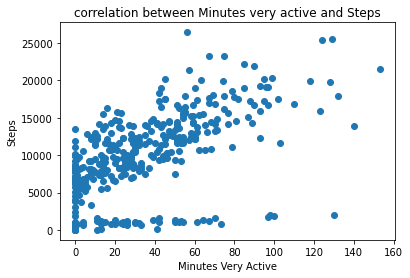

In [88]:
"""
plt.scatter(fitbit["Minutes Very active"],fitbit["Steps"] #)
plt.title(#)
plt.xlabel(#)
plt.ylabel(#)
plt.show()
"""
plt.scatter(fitbit["Minutes Very Active"],fitbit["Steps"])
plt.title("correlation between Minutes very active and Steps")
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [91]:
"""
your commments here: 
"""
#we have a positive linear correlation#

'\nyour commments here: \n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [92]:
# your code here
fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

0.07690608062990098

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

Text(0, 0.5, 'Steps')

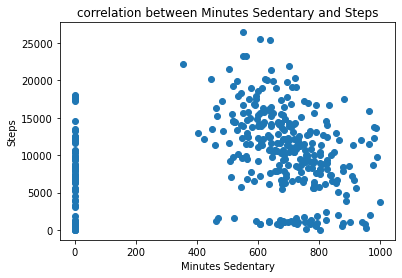

In [93]:
# your code here
plt.scatter(fitbit["Minutes Sedentary"],fitbit["Steps"])
plt.title("correlation between Minutes Sedentary and Steps")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [94]:
# your code here
fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

0.1309856595083637

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

Text(0, 0.5, 'Steps')

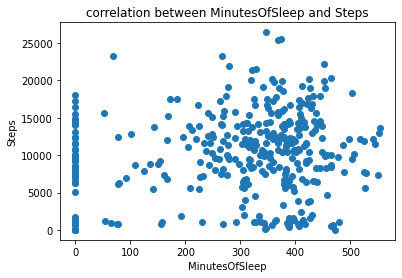

In [95]:
# your code here
plt.scatter(fitbit["MinutesOfSleep"],fitbit["Steps"])
plt.title("correlation between MinutesOfSleep and Steps")
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")

In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [4]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [5]:
# your code here
cor_fit=columns[1:4]
cor_fit

['Steps', 'Floors', 'Minutes Sedentary']

In [10]:
df = pd.DataFrame(columns)
df

,0
0,Calorie burned
1,Steps
2,Floors
3,Minutes Sedentary
4,Minutes Very Active
5,MinutesOfSleep


In [12]:
df1 = pd.DataFrame(cor_fit)
df1

,0
0,Steps
1,Floors
2,Minutes Sedentary


In [14]:
df1["0"].corr(df["0"])

#data_sp["Close"].corr(data_apple["Close"])

KeyError: '0'

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
# your code here

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [ ]:
# your code here

#### Show visually the frequency distribution of the `time_grades` dataset.

In [ ]:
# your code here

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""